# **Task 1**
## **Author:** Aniruddha Jana
## **Task description:**
The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Reading Iris Dataset

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Randomising the dataset

In [4]:
data = data.sample(frac=1).reset_index(drop=True)
data = data.drop(columns='Id')

## Data Description

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.0,2.7,5.1,1.6,Iris-versicolor
1,7.1,3.0,5.9,2.1,Iris-virginica
2,5.9,3.0,5.1,1.8,Iris-virginica
3,5.7,3.0,4.2,1.2,Iris-versicolor
4,6.9,3.2,5.7,2.3,Iris-virginica


In [6]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,5.8,2.8,5.1,2.4,Iris-virginica
146,5.0,3.0,1.6,0.2,Iris-setosa
147,5.0,3.3,1.4,0.2,Iris-setosa
148,4.9,3.0,1.4,0.2,Iris-setosa
149,5.1,3.3,1.7,0.5,Iris-setosa


In [7]:
data.nunique() #unique values

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [8]:
data.shape #shape of the dataset

(150, 5)

In [9]:
data.isnull().sum() # checking for null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
print(data.groupby(["Species"]).size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis

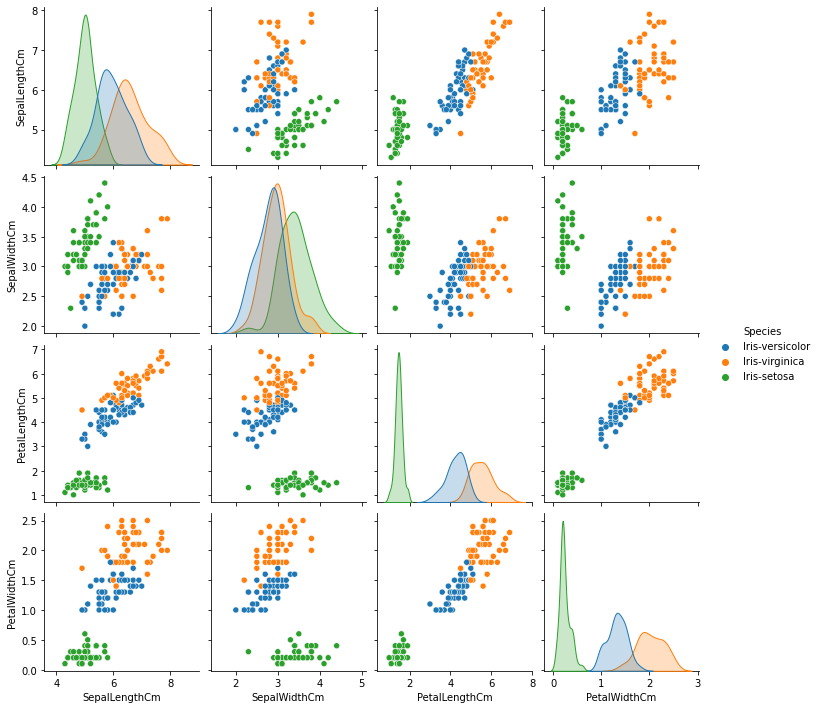

In [13]:
sns.pairplot(data, hue='Species')

## Correlation Matrix

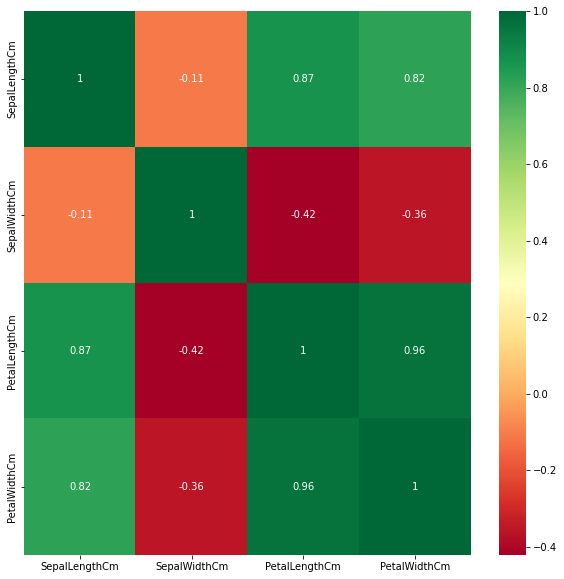

In [14]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heatmap
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

## Histogram of features

Sepal Length and width

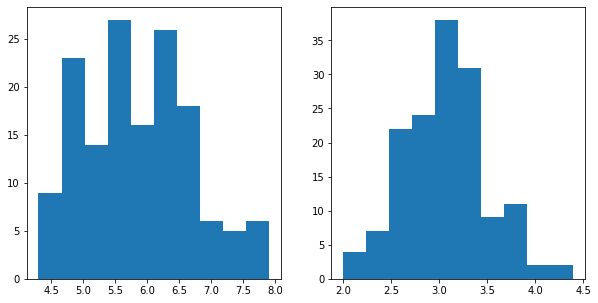

In [15]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['SepalLengthCm'])
f2.hist(data['SepalWidthCm'])
plt.show()

Petal Length and width

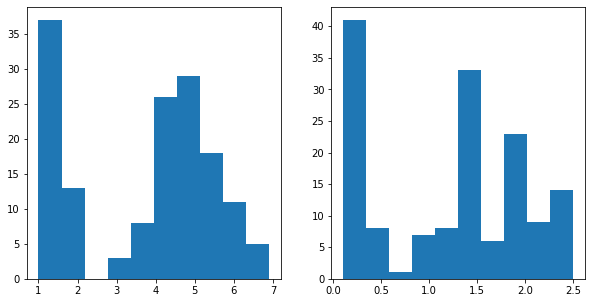

In [16]:
fig2 = plt.figure(figsize=(10, 5))
f1 = fig2.add_subplot(121)
f2 = fig2.add_subplot(122)
f1.hist(data['PetalLengthCm'])
f2.hist(data['PetalWidthCm'])
plt.show()

## Boxplots of features

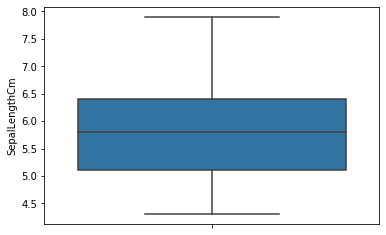

In [17]:
sns.boxplot(y='SepalLengthCm',data=data)

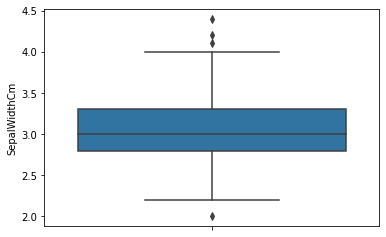

In [18]:
sns.boxplot(y='SepalWidthCm',data=data)

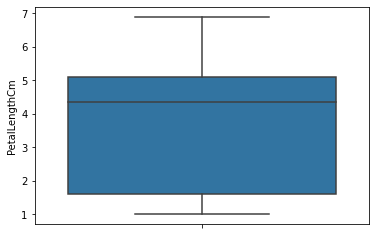

In [19]:
sns.boxplot(y='PetalLengthCm',data=data)

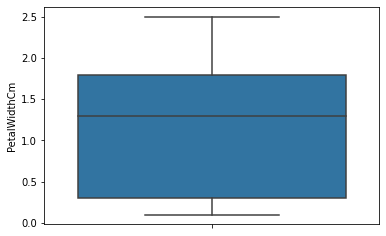

In [20]:
sns.boxplot(y='PetalWidthCm',data=data)

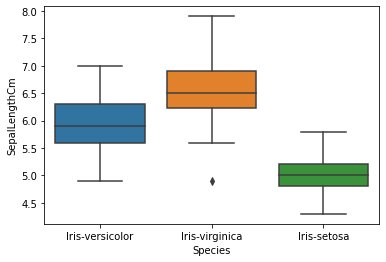

In [21]:
sns.boxplot(x='Species', y='SepalLengthCm',data=data)

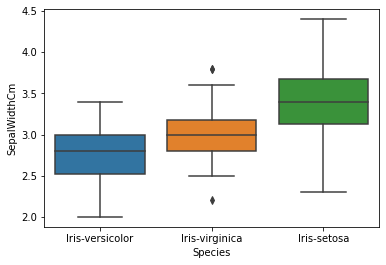

In [22]:
sns.boxplot(x='Species', y='SepalWidthCm',data=data)

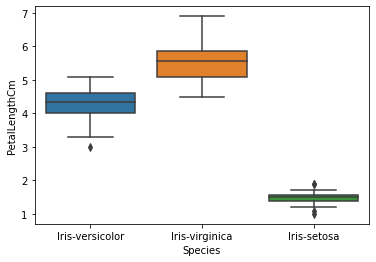

In [23]:
sns.boxplot(x='Species', y='PetalLengthCm',data=data)

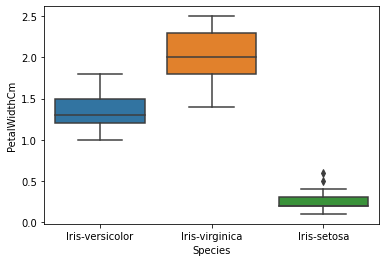

In [24]:
sns.boxplot(x='Species', y='PetalWidthCm',data=data)

## Data splitting

In [25]:
X = data.iloc[:,0:4]
y = data['Species']

In [26]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.0,2.7,5.1,1.6
1,7.1,3.0,5.9,2.1
2,5.9,3.0,5.1,1.8
3,5.7,3.0,4.2,1.2
4,6.9,3.2,5.7,2.3


In [27]:
y.head()

0    Iris-versicolor
1     Iris-virginica
2     Iris-virginica
3    Iris-versicolor
4     Iris-virginica
Name: Species, dtype: object

## Feature importance

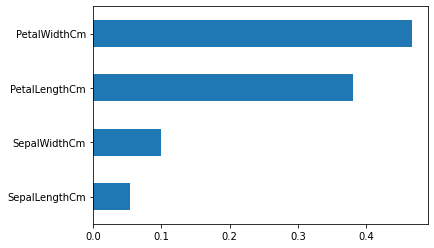

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
fmodel = ExtraTreesClassifier()
fmodel.fit(X,y)
feat_importances = pd.Series(sorted(fmodel.feature_importances_), index= X.columns)
feat_importances.plot(kind='barh')
plt.show()

### Label encoder

In [29]:
le = LabelEncoder()
y = le.fit_transform(y)

## Training model

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=1)

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## Performance Evaluation

In [32]:
from sklearn.metrics import accuracy_score
pred = rf.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test, pred),5)*100,"%")

Accuracy: 93.333 %


### Confusion matrix

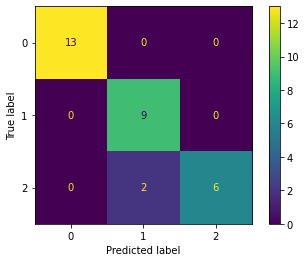

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()